**Project: Storytelling Data Visualization on Exchange Rates**

The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

Source: [Kaggle](https://www.kaggle.com/lsind18/euro-exchange-daily-rates-19992020)

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, matplotlib.style as style, seaborn as sns
sns.set()

%matplotlib inline

In [2]:
data = pd.read_csv('euro-daily-hist_1999_2020.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [3]:
data.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


In [4]:
# Data processing

# col heads
cols_clean = list()

for col in data.columns:
    col = col.lower().replace('[','').replace(']','').replace('\\', ' ').replace(':', '').strip().replace(' ', '_')
    cols_clean.append(col)
    
data.columns = cols_clean                                       

# date column
data.iloc[:, 0] = pd.to_datetime(data.iloc[:, 0])

# dtypes
for col in data.iloc[:, 1:]:
    for row in data.index:
        if data.loc[row, col] == '-': 
            data.loc[row, col] = 0
            
    data[col] = data[col].astype(float)

In [5]:
data.sample(2)

,period_unit,australian_dollar,bulgarian_lev,brazilian_real,canadian_dollar,swiss_franc,chinese_yuan_renminbi,cypriot_pound,czech_koruna,danish_krone,...,romanian_leu,russian_rouble,swedish_krona,singapore_dollar,slovenian_tolar,slovak_koruna,thai_baht,turkish_lira,us_dollar,south_african_rand
4443,2003-10-27,1.6694,1.9488,3.3781,1.5371,1.5476,9.7238,0.58425,32.101,7.4313,...,3.8845,35.3145,9.0705,2.0457,235.60,41.450,46.9274,1.7657,1.1748,8.1453
3832,2006-02-28,1.6051,1.9558,2.5381,1.3532,1.5661,9.5493,0.57470,28.320,7.4610,...,3.4802,33.3680,9.4490,1.9281,239.49,37.108,46.5260,1.5585,1.1875,7.3520


In [6]:
data.describe()

,australian_dollar,bulgarian_lev,brazilian_real,canadian_dollar,swiss_franc,chinese_yuan_renminbi,cypriot_pound,czech_koruna,danish_krone,estonian_kroon,...,romanian_leu,russian_rouble,swedish_krona,singapore_dollar,slovenian_tolar,slovak_koruna,thai_baht,turkish_lira,us_dollar,south_african_rand
count,5699.000000,5297.000000,5431.000000,5699.000000,5699.000000,5431.000000,2346.000000,5699.000000,5699.000000,3130.000000,...,5637.000000,5699.000000,5699.000000,5699.000000,2085.000000,2608.000000,5699.000000,5637.000000,5699.000000,5699.000000
mean,1.562436,1.933075,3.136824,1.453409,1.345663,8.510026,0.568000,28.114086,7.367877,15.366661,...,3.867979,45.693038,9.295891,1.744807,220.751585,38.785187,41.604372,2.689991,1.186652,11.266475
std,0.225421,0.203436,1.019005,0.181776,0.248381,1.467549,0.076829,4.606765,0.772858,2.074393,...,0.862420,18.446824,1.157375,0.280052,33.337762,6.719804,6.438629,1.867694,0.203848,3.720753
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.291200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.370100,0.000000,0.000000
25%,1.468500,1.955800,2.524200,1.396600,1.152700,7.683050,0.574380,25.680000,7.439700,15.646600,...,3.516200,34.296000,9.024500,1.582700,211.582800,37.363750,38.420550,1.680000,1.095050,8.299750
50%,1.604500,1.955800,2.961800,1.466200,1.454300,8.208300,0.577700,27.068000,7.449100,15.646600,...,4.214200,39.666500,9.247800,1.696800,229.885000,40.577500,40.768500,2.103000,1.198800,10.367600
75%,1.676550,1.955800,3.660500,1.544550,1.547900,9.649000,0.581900,30.563000,7.458800,15.646600,...,4.476800,62.759100,9.592100,1.990900,239.500000,42.730250,45.987900,3.059300,1.319350,14.423650
max,2.073500,1.962000,6.768000,1.812300,1.680300,11.284000,0.588800,38.583000,7.473200,15.646600,...,4.876800,93.745000,11.713500,2.232300,240.030000,47.484000,53.536000,10.148900,1.599000,20.845200


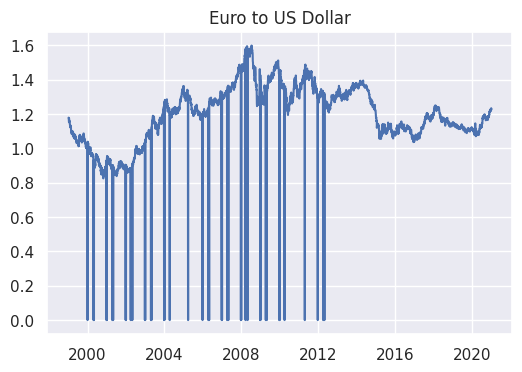

In [7]:
# Visualise
plt.plot(data['period_unit'], data['us_dollar'])
plt.title('Euro to US Dollar')
plt.show();

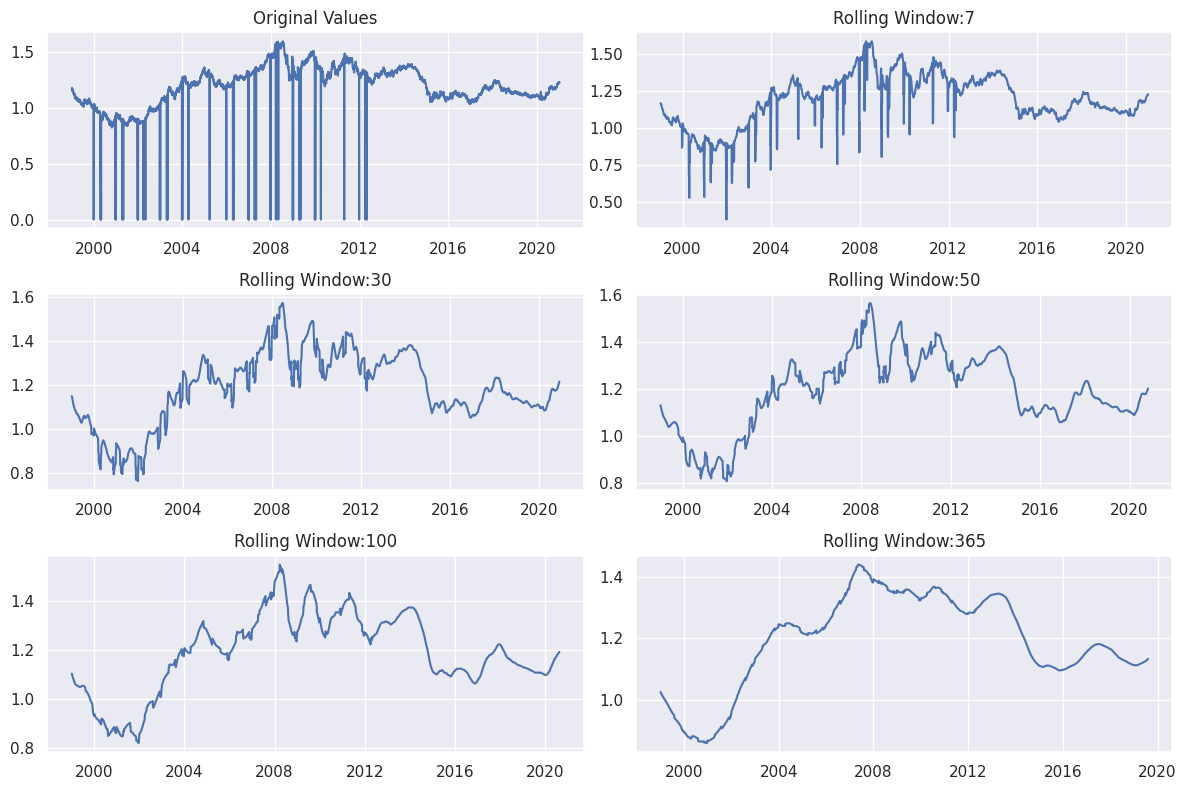

In [8]:
plt.figure(figsize=(12,8))

plt.subplot(3,2,1)
plt.plot(data['period_unit'], data['us_dollar'])
plt.title('Original Values')

for i, rolling_mean in zip([2, 3, 4, 5, 6],
                           [7, 30, 50, 100, 365]):
    plt.subplot(3,2,i)
    plt.plot(data['period_unit'],
             data['us_dollar'].rolling(rolling_mean).mean())
    plt.title('Rolling Window:' + str(rolling_mean))
    
plt.tight_layout() 
plt.show();

In [12]:
#Storytelling Data Visualization Examples

# Financial Crisis Example

financial_crisis = data[['period_unit', 'us_dollar']].copy()[
    (data['period_unit'].dt.year >= 2006) & 
    (data['period_unit'].dt.year <= 2009)]

financial_crisis['rolling_mean'] = financial_crisis['us_dollar'].rolling(30).mean()

financial_crisis_7_8 = data[['period_unit', 'us_dollar']].copy()[
    (data['period_unit'].dt.year >= 2007) & 
    (data['period_unit'].dt.year <= 2008)]

financial_crisis_7_8['rolling_mean'] = financial_crisis_7_8['us_dollar'].rolling(30).mean()

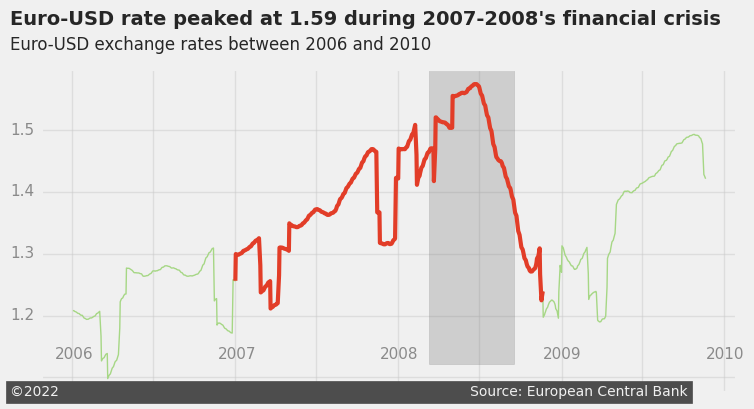

In [15]:
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding the plot
fig,ax = plt.subplots(figsize=(8,4))
ax.plot(financial_crisis['period_unit'],
        financial_crisis['rolling_mean'],
        linewidth=1, color='#A6D785')

### Highlighting the 2007-2008 period
ax.plot(financial_crisis_7_8['period_unit'],
        financial_crisis_7_8['rolling_mean'],
        linewidth=3, color='#e23d28')

### Highlihting the peak of the crisis
ax.axvspan(xmin=733112.0, xmax=733302.0, ymin=0.09,
           alpha=0.3, color='grey')
    
### Adding separate tick labels
ax.set_xticklabels([])
ax.set_yticklabels([])

x = 732272.0
for year in ['2006', '2007', '2008', '2009', '2010']:
    ax.text(x, 1.13, year, alpha=0.5, fontsize=11)
    x += 365

y = 1.193   
for rate in ['1.2', '1.3', '1.4', '1.5']:
    ax.text(732172.0, y, rate, alpha=0.5, fontsize=11)
    y += 0.1

## Adding a title and a subtitle    
ax.text(732172.0, 1.67, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold')
ax.text(732172.0, 1.63, 'Euro-USD exchange rates between 2006 and 2010',
        size=12)

### Adding a signature
ax.text(732172.0, 1.07, '©2022' + ' '*94 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)

### Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()

In [18]:
# By US President
bush_obama_trump = data[['period_unit', 'us_dollar']].copy()[
    (data['period_unit'].dt.year >= 2001) & 
    (data['period_unit'].dt.year < 2021)]

bush_obama_trump['rolling_mean'] = bush_obama_trump['us_dollar'].rolling(30).mean()

bush = bush_obama_trump.copy()[bush_obama_trump['period_unit'].dt.year < 2009]

obama = bush_obama_trump.copy()[
    (bush_obama_trump['period_unit'].dt.year >= 2009) & 
    (bush_obama_trump['period_unit'].dt.year < 2017)]

trump = bush_obama_trump.copy()[
    (bush_obama_trump['period_unit'].dt.year >= 2017) & 
    (bush_obama_trump['period_unit'].dt.year < 2021)]

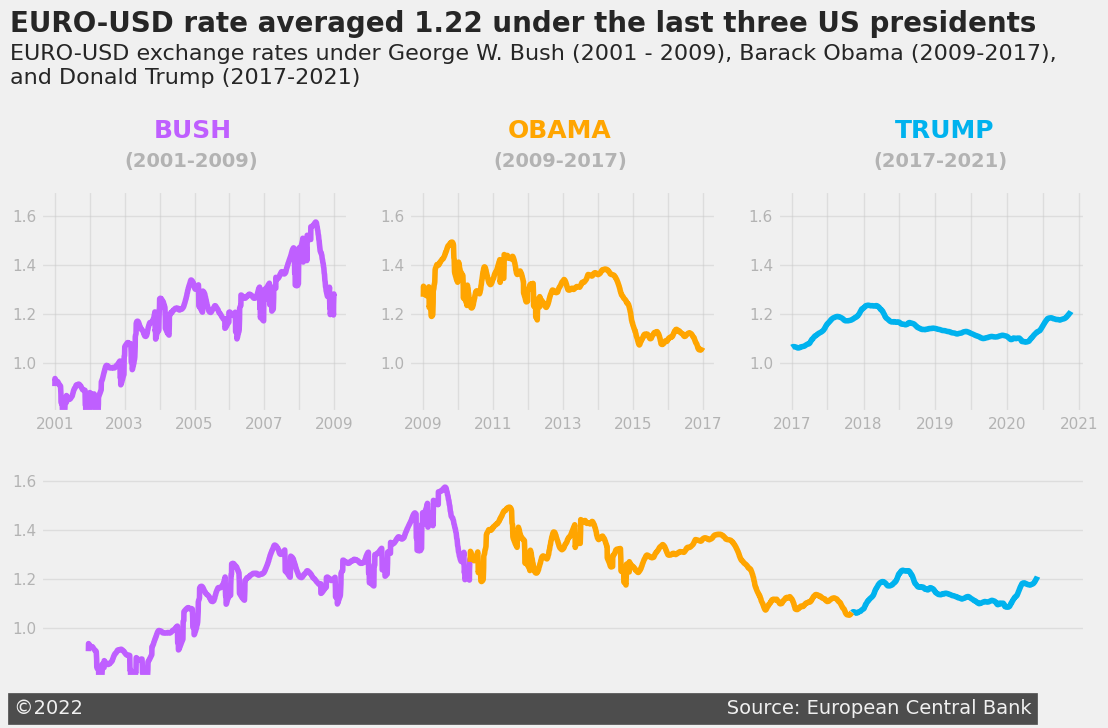

In [21]:
### Adding the FiveThirtyEight style
style.use('fivethirtyeight')

### Adding the subplots
plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

### Changes to all the subplots
for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=0.3)
    ax.grid(alpha=0.5)    
    

### Ax1: Bush
ax1.plot(bush['period_unit'], bush['rolling_mean'],
        color='#BF5FFF')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
                     '2007', '', '2009'],
                   alpha=0.3)
ax1.text(731516.0, 1.92, 'BUSH', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(731216.0, 1.8, '(2001-2009)', weight='bold',
        alpha=0.3)


### Ax2: Obama
ax2.plot(obama['period_unit'], obama['rolling_mean'],
        color='#ffa500')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'],
                   alpha=0.3)
ax2.text(734288.0, 1.92, 'OBAMA', fontsize=18, weight='bold',
        color='#ffa500')
ax2.text(734138.0, 1.8, '(2009-2017)', weight='bold',
         alpha=0.3)


### Ax3: Trump
ax3.plot(trump['period_unit'], trump['rolling_mean'],
        color='#00B2EE')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'],
                   alpha=0.3)
ax3.text(736855.0, 1.92, 'TRUMP', fontsize=18, weight='bold',
        color='#00B2EE')
ax3.text(736745.0, 1.8, '(2017-2021)', weight='bold',
         alpha=0.3)

### Ax4: Bush-Obama-Trump
ax4.plot(bush['period_unit'], bush['rolling_mean'],
        color='#BF5FFF')
ax4.plot(obama['period_unit'], obama['rolling_mean'],
        color='#ffa500')
ax4.plot(trump['period_unit'], trump['rolling_mean'],
        color='#00B2EE')
ax4.grid(alpha=0.5)
ax4.set_xticks([])

### Adding a title and a subtitle
ax1.text(730016.0, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(730016.0, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''',
        fontsize=16)

### Adding a signature
ax4.text(729916.0, 0.65, '©2022' + ' '*103 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

plt.show()